In [ ]:
Importing all dependencies

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

Loading of Data

In [85]:
# Specify the full path to the CSV file
file_path = r'D:\Data Science\AAIT\Cap Stone Project\Data\Merged Data\Fillna\Merged_reviews.csv'

# Load the reviews data from the specified path
df = pd.read_csv(file_path)

DaData Cleaning and Preprocessing

In [86]:
#Checking for missing value
df.isna().sum()

Rating              0
Review_title        0
Review_comment    305
Hotel_site          0
dtype: int64

In [87]:
# Inspect rows with missing Review_comment
print(df[df['Review_comment'].isna()])

# Fill missing Review_comment values with Review_title
df['Review_comment'].fillna(df['Review_title'], inplace=True)


# Verify there are no missing Review_comment values
assert df['Review_comment'].isna().sum() == 0

# Check the DataFrame
print(df.head())

     Rating Review_title Review_comment   Hotel_site
62      5.0  Exceptional            NaN  Addis Ababa
63      5.0  Exceptional            NaN  Addis Ababa
64      4.0    Very good            NaN  Addis Ababa
65      5.0          top            NaN  Addis Ababa
66      5.0  Exceptional            NaN  Addis Ababa
..      ...          ...            ...          ...
601     4.0    Very good            NaN        Ziway
602     4.0    Very good            NaN        Ziway
603     3.5         Good            NaN        Ziway
604     3.0     Pleasant            NaN        Ziway
613     5.0  Exceptional            NaN        Ziway

[305 rows x 4 columns]
   Rating  \
0     5.0   
1     5.0   
2     5.0   
3     5.0   
4     5.0   

                                                                                                               Review_title  \
0                                                                                                               Exceptional   
1      

In [88]:
import nltk
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Customize stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would", "shall", "could", "might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words = set(stop_words)
print(stop_words)

{'they', 're', 'have', 'themselves', 'with', 'by', 'each', 'isn', "isn't", 'was', "mustn't", 'should', 'above', 'my', 'did', 'when', 'such', 'will', "should've", 'of', 'a', 'why', 'so', 've', "haven't", 'ain', 'what', 'from', 'd', 'before', 'between', 'me', "she's", 'myself', 'because', 'are', 'y', 'hadn', 'their', 'against', 'how', 'but', 'he', "needn't", 'other', 'some', 'out', 'doing', 'we', 'no', 'its', "won't", 'shan', 'won', 'it', 'being', 'few', 'our', 'below', 'both', 'am', 'them', 'had', 'could', 'm', 'over', 'for', 'needn', 'any', "aren't", 'as', 'itself', 'these', "doesn't", 'doesn', 'does', 'where', 'll', 'him', 'which', 'o', 'on', 'through', 'just', 'can', 'this', 'again', 'his', 'aren', 'most', 'now', 'yourself', 'if', "didn't", 'be', 'wasn', 'shall', 'until', "mightn't", "wasn't", 'haven', "shan't", 'whom', 'would', 'here', "wouldn't", 'shouldn', 'do', 'don', 'has', 'off', 'ourselves', 'under', 'yours', 'only', "hasn't", 'after', 'up', 'very', 'there', 'while', 'down', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data cleaning and preprocessing pipeline

In [89]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Removing special characters
def remove_special_character(content):
    return re.sub('\W+', ' ', content)

# Removing URLs
def remove_url(content):
    return re.sub(r'http\S+|www\S+|https\S+', '', content)

# Removing stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of English contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "will not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)
    return content

# Comprehensive data cleaning function
def data_cleaning(content):
    # Convert non-string entries to strings
    if not isinstance(content, str):
        content = str(content)
    
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    content = remove_stopwords(content)
    content = content.lower()
    tokens = content.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    cleaned_content = ' '.join(tokens)
    return cleaned_content
df.columns

Index(['Rating', 'Review_title', 'Review_comment', 'Hotel_site'], dtype='object')

In [90]:
import pandas as pd

# Set display options
pd.options.display.max_colwidth = 1000

# Apply data cleaning to the 'Review_comment' column and save it back to the same column
df['Review_comment'] = df['Review_comment'].apply(data_cleaning)

# Display the results
print(df[['Review_comment']].head(5))


                                                                                                                                                                                                                                                                                                                                                             Review_comment
0                                                                                                                                                                                                                                                                                                          courteous friendly service nice spa facility delicious breakfast
1  stay haile grand addis hotel nothing short exceptional opulent decor impeccable service every aspect exuded luxury room offered great view including great view addis ababa night complemented indulgent amenity truly enhanced experience anyone seeking blend comfort sophi

In [ ]:
# double-check for any other missing values

In [91]:
# Check for missing values in the entire DataFrame
print(df.isnull().sum())

#Fill missing 'Rating' with the mean rating
df['Rating'].fillna(df['Rating'].mean(), inplace=True)


Rating            0
Review_title      0
Review_comment    0
Hotel_site        0
dtype: int64


In [92]:
df['Rating'].describe()

count    618.000000
mean       4.344660
std        0.959966
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [93]:
#Remove ratings that are outside the typical range (0 to 5)
df = df[(df['Rating'] >= 0) & (df['Rating'] <= 5)]


In [94]:
#Convert 'Rating' to integer if it's not already
df['Rating'] = df['Rating'].astype(int)

In [95]:
print('Unique reviews:%s' % df.Review_comment.nunique())
print('No of ratings:%s'% df['Rating'].count())

Unique reviews:322
No of ratings:618


Exploratory Data Analysis

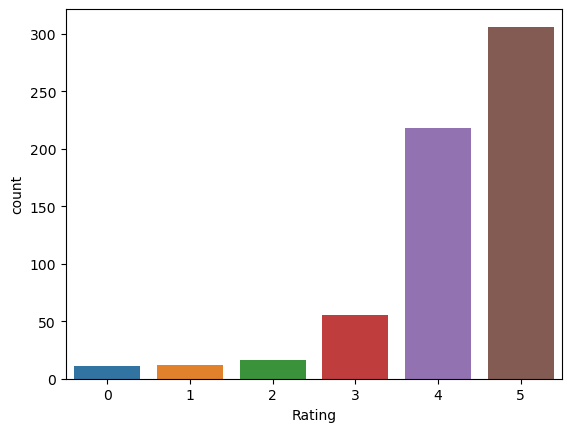

Rating
5    306
4    218
3     55
2     16
1     12
0     11
Name: count, dtype: int64


In [96]:
#Checking for Class Imbalance 
sns.countplot(x=df['Rating'])
plt.show()
print(df['Rating'].value_counts())

Visualization of Important Words from Positive Reviews

(-0.5, 1499.5, 799.5, -0.5)

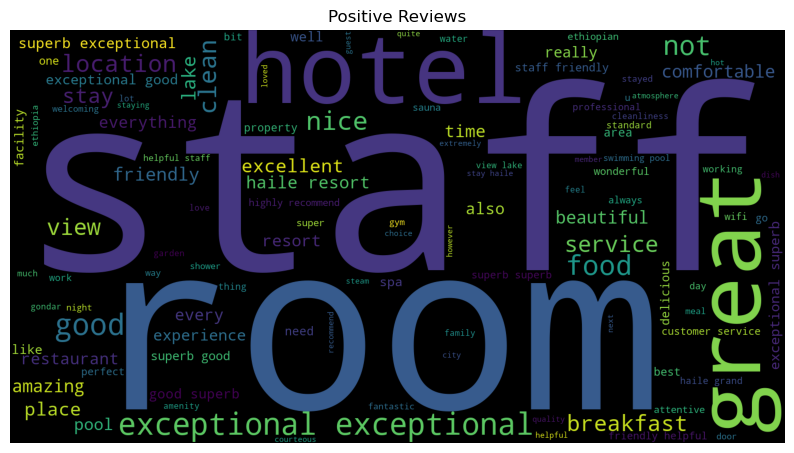

In [97]:
sentences=df['Review_comment']
pos=' '.join(map(str,sentences[df['Rating']>=4]))
neg=' '.join(map(str,sentences[df['Rating']<=2]))
  
pos_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(pos) 

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

Visualization of Important Words from Negative Reviews

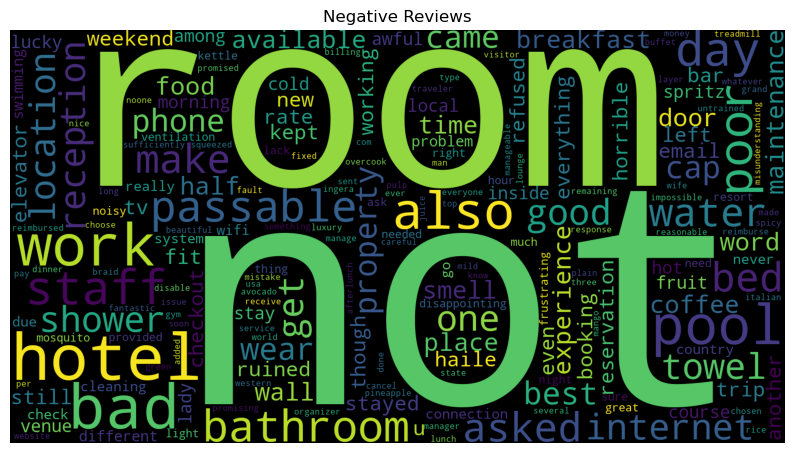

In [98]:
neg_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(neg) 

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show() 

Basic Statistic of Review data

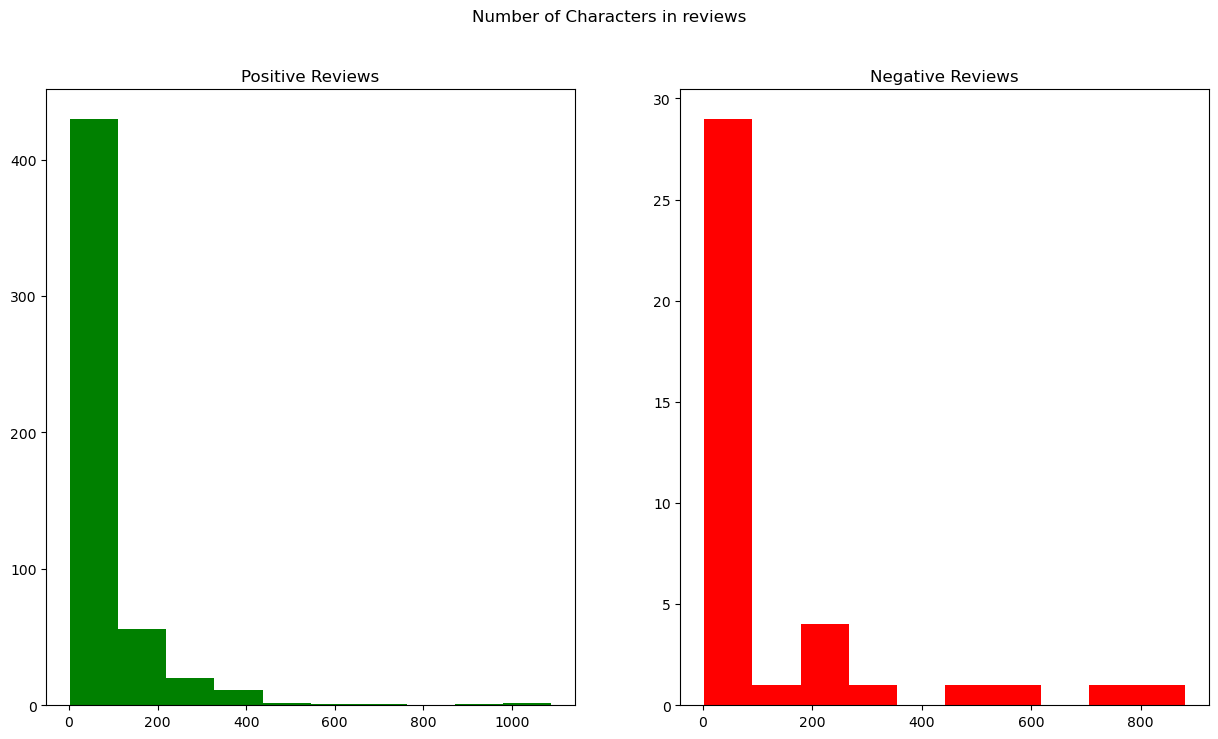

In [99]:
#Visulaization of number of charactor in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['Rating']>=4]['Review_comment'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df[df['Rating']<=2]['Review_comment'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews')
plt.show()

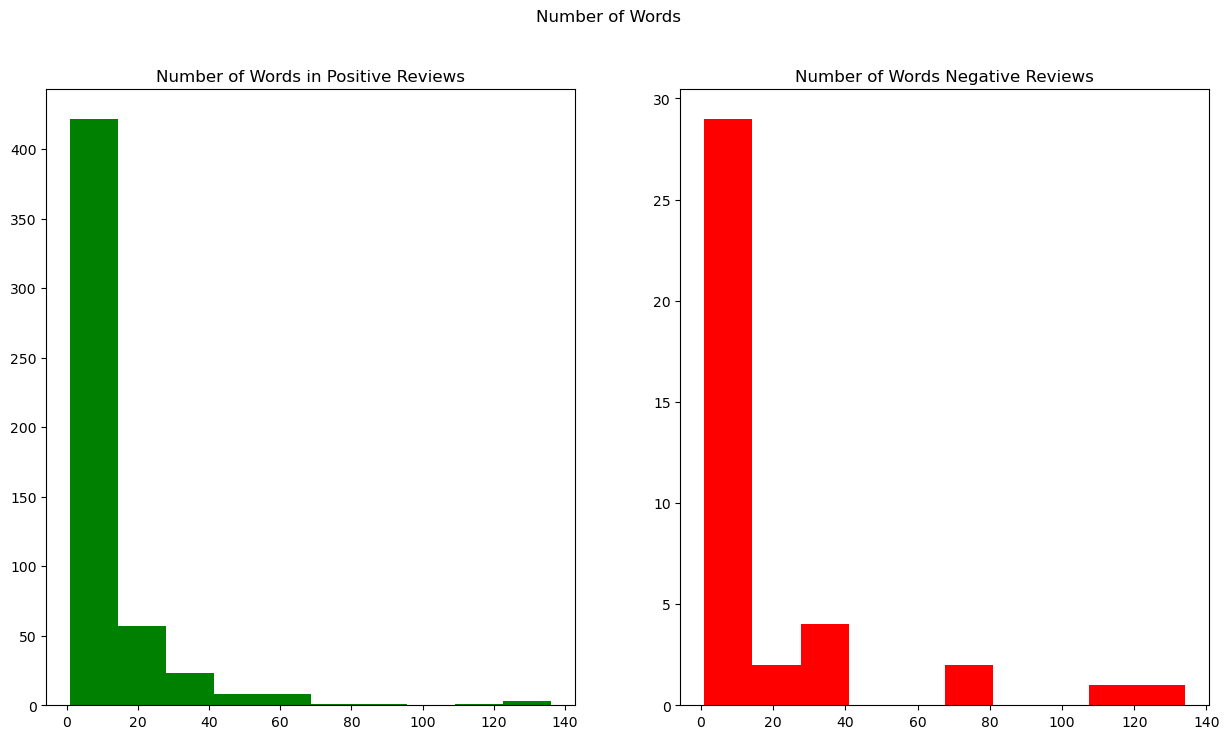

In [100]:
#Visulaization of number of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Rating']>=4]['Review_comment'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Number of Words in Positive Reviews')
neg_word=df[df['Rating']<=2]['Review_comment'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word,color='red')
neg_ax.set_title('Number of Words Negative Reviews')
figure.suptitle('Number of Words')
plt.show()

Text(0.5, 0.98, 'Average word length in Reviews')

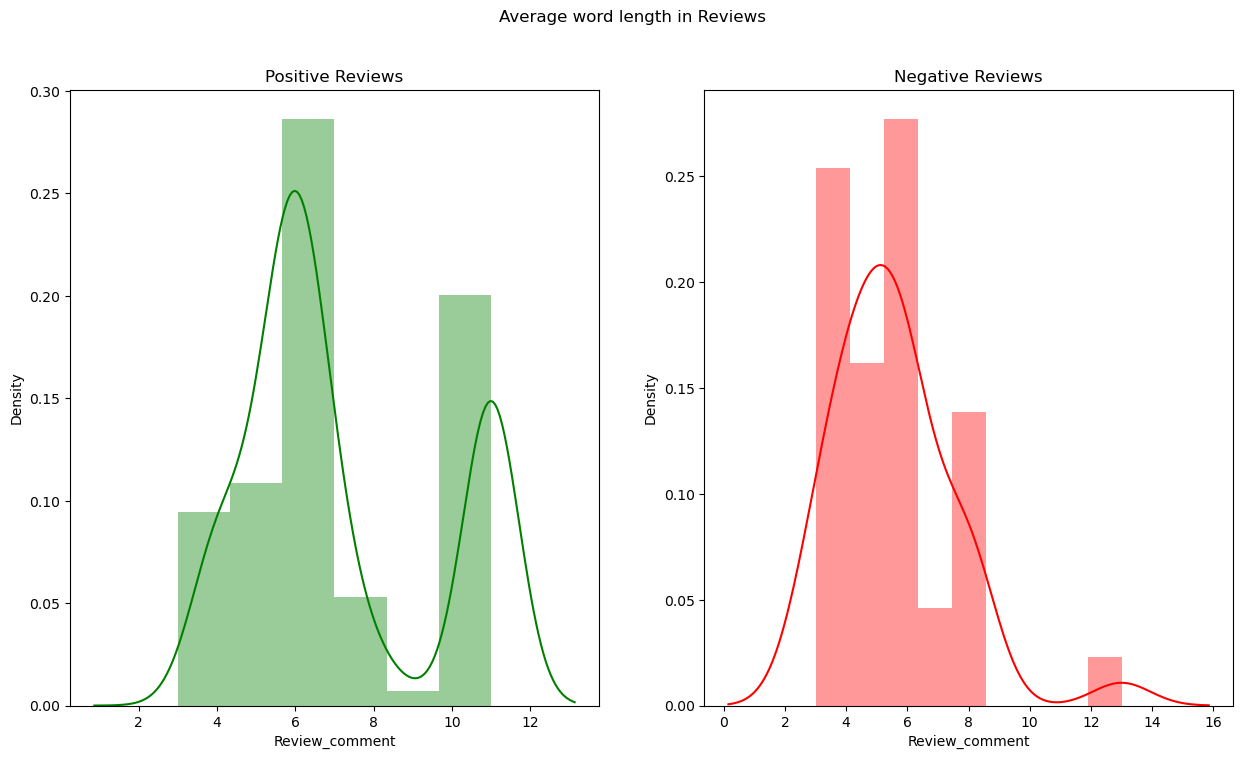

In [102]:
#Visulaize average of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Rating']>=4]['Review_comment'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Rating']<=2]['Review_comment'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in Reviews')

In [103]:
# Save the cleaned dataset
df.to_csv('Merged_reviews_cleaned_II.csv', index=False)